# Customers satisfaction prediction

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from  customers. This is a crucial function to improve our operations across all levels. We recently did a survey to a select customer cohort. The data description is presented:

Data Description:   
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers  
X1 = my order was delivered on time  
X2 = contents of my order was as I expected  
X3 = I ordered everything I wanted to order  
X4 = I paid a good price for my order  
X5 = I am satisfied with my courier  
X6 = the app makes ordering easy for me  

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

This kind of predictions are useful to make predictions on customers satisfaction and to know what makes customers happy. It is essential to any business to know areas for improvement. This task is great way to identify these areas and grow the startup by making existing customers happy and acquiring new customers. 

## Objectives

- Build a classification model that best predicts happiness of customers from other responses. 
- Find features that are most important in classifying. This way we can find the areas that are most important in customer satisfaction and emphasize improvement efforts on them.

### Importing libraries

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import lazypredict package
import lazypredict
from lazypredict.Supervised import LazyClassifier

# Import sklearn data split and hyperparameters tuning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Import metrics packages of sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# Import classifier models
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### Loading the data

In [2]:
# Load dataset
df = pd.read_csv('datasets/ACME-HappinessSurvey2020.csv')

# Inspect data
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Exploring the data

In [3]:
# Inspect data to check if there are any NA entries and make sure we have proper type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# Print summary of statistics
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


From summary of statistics, it is clear that customers are happy in 55% of cases (Y mean is 0.55). Also, all responses are in average above 3 except for X2 - "contents of order is as expected". This parameter does not directly depend on us, however it can effect our customer's satisfaction. So, one of the purposes of the project is to identify how important is this parameter in customer happiness.  
Another parameter that has median of 3.0 is X3 - "I ordered everything I wanted to order". As with X2 this parameter does not directly depend on us. However it can bve crucial for customer satisfaction.

Now I build count plots, to explore distribution of data in each parameter. It can show us if there is any skewing of data to one side. Or if there are any outliers that are out of range.

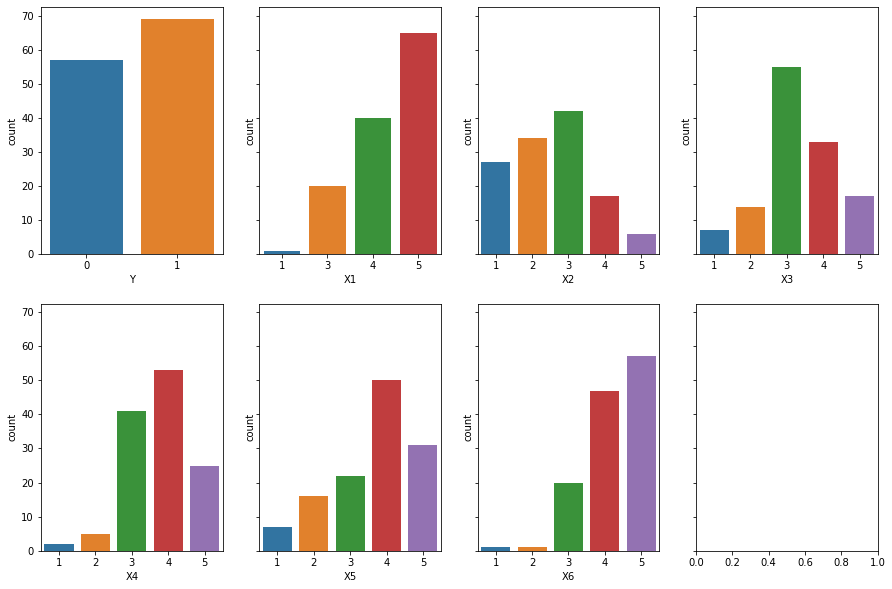

In [5]:
# Build count plots of data to see distribution of it
fig, axs = plt.subplots(nrows = 2, ncols = 4, sharey=True, figsize = (15,10))

for col, ax in zip(df.columns, axs.ravel()):
    sns.countplot(x= col, data = df,ax=ax)

From countplots on our parameters I noticed that customers are satisfied with delivery timing of parcels, as X1 parameter has median value of 5. However the satisfaction with courier is lower, which can be seen from parameter X5. It can be due to the pricing of service, which consumers are not always happy with (X4). Customers also like the app that makes ordering easy as well. It can be seen from parameter X6.  
When it comes to satisfaction with order, the grades are lower. With X2 parameter being skewed to the left, consumers are not happy with content of the order, and tend to give lower marks. And on question if they ordered everything they wanted, the grade is average.

<AxesSubplot:>

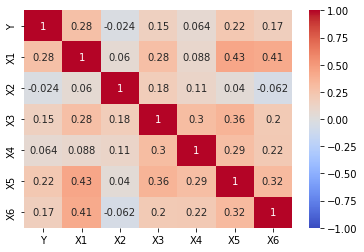

In [6]:
# Build a heatmap of correlation of values in dataset
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)



Heatmap indicates that there is no too strong correlation between any two freatures. 
Data is clean, and can be used right away.


## Splitting the data

Next step is to split the data into train set and test set to prepare data for two different phases of machine learning modelling.

In [7]:
# Assign columns to according datasets
X = df.drop('Y', axis = 1)
y = df[['Y']]

# Chose test size to be 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1126)
print(f'Train set has {X_train.shape[0]} entries')
print(f'Test set has {X_test.shape[0]} entries')

Train set has 100 entries
Test set has 26 entries




## Exploring default models performance using lazypredict
First I used **lazypredict** to run many different classification algorithms to find ones that are best for this case. Then I  run them separately to confirm results from **lazypredict**. Found in [here](https://towardsdatascience.com/how-to-run-30-machine-learning-models-with-2-lines-of-code-d0f94a537e52).

In [8]:
# Create classifier model with default parameters
clfs = LazyClassifier(verbose = 0, ignore_warnings = True, random_state = 1126)

# Fit models to our train and test data
models, predictions = clfs.fit(X_train, X_test, y_train, y_test)
print(models)

100%|███████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.69               0.74     0.74      0.70   
LabelSpreading                     0.69               0.74     0.74      0.70   
ExtraTreesClassifier               0.73               0.74     0.74      0.74   
RandomForestClassifier             0.73               0.74     0.74      0.74   
BaggingClassifier                  0.69               0.71     0.71      0.70   
XGBClassifier                      0.65               0.68     0.68      0.67   
DummyClassifier                    0.69               0.67     0.67      0.70   
NuSVC                              0.62               0.65     0.65      0.63   
LGBMClassifier                     0.58               0.62     0.62      0.59   
SVC                                0.58               0.62     0.62      0.59   
ExtraTreeClassifier         

As we can see from the results above, multiple models could pass the threshold of 73% accuracy: 

- ExtraTreeClassifier
- RandomForestClassifier

All of them are tree based models. Next, I will run them myself to test results of lazypredict. In this part I will not try to tune hyperparameters, just run models on default settings:
from sklearn.tree import ExtraTreeClassifierfrom sklearn.tree import ExtraTreeClassifier

### Extra Tree

Accuracy score: 0.62

Classification report:
               precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.79      0.61      0.69        18

    accuracy                           0.62        26
   macro avg       0.60      0.62      0.59        26
weighted avg       0.67      0.62      0.63        26



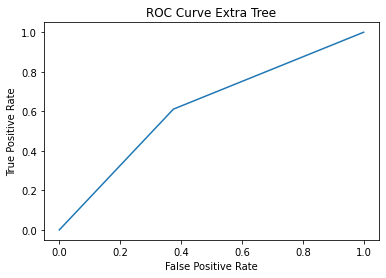

In [9]:
# Create Extra Tree classifier with default parameters
clf = ExtraTreeClassifier(random_state = 1126)

# Fit model to the train set
clf.fit(X_train, y_train)

# Predict values from the test set
y_pred = clf.predict(X_test)

# Accuracy score and classification report of the model
print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

# Build ROC curve
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Extra Tree')
plt.title('ROC Curve Extra Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Extra tree classifier performed worse than was predicted by lazypredict. It's accuracy score is 0.62 now. It might be due to the random state that I have selected. However,  performance of models should not depend on random states. So I will drop this model from consideration.

Classificatin report is printed to measure the quality of predictions. Precision, recall and F1 scores are presented for both labels: happy and unhappy. One thing one can notice is that distribution of 0 and 1 in test set is not even. There are substantially more positive labels, 18 vs 8. Precision  for happy label is higher than for unhappy one. It means that model is better in predicting happy customers than unhappy ones.  

Also ROC (ReceiverOperating Characteristic) curve was plotted to demonstrate diagnostic ability of the model with the discrimination threshold.

### Random Forest

Accuracy score: 0.73

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.87      0.72      0.79        18

    accuracy                           0.73        26
   macro avg       0.71      0.74      0.71        26
weighted avg       0.77      0.73      0.74        26



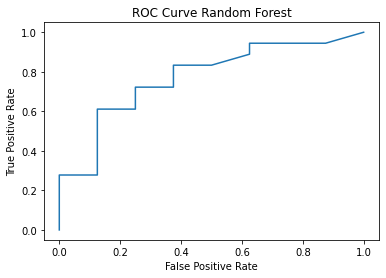

In [10]:
# Create Random Forest classifier with default parameters
clf = RandomForestClassifier(random_state = 1126)

# Fit model to the train set
clf.fit(X_train, y_train)

# Predict values from the test set
y_pred = clf.predict(X_test)

# Accuracy score and classification report of the model
print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

# Build ROC curve
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Random Forest')
plt.title('ROC Curve Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Random fores classifier performed as was predicted by lazypredict. It's accuracy score is 0.73, so passes the threshold. Classificatin report is printed to measure the quality of predictions. Precision, recall and F1 scores are presented for both labels: happy and unhappy. One thing one can notice is that distribution of 0 and 1 in test set is not even. There are substantially more positive labels, 18 vs 8. Precision  for happy label is higher than for unhappy one, 0.87 vs 0.55. It means that model is better in predicting happy customers than unhappy ones.  

Also ROC (ReceiverOperating Characteristic) curve was plotted to demonstrate diagnostic ability of the model with the discrimination thresholds. Situation here is better as curve is more skewed to the left top part of the chart.


Next step will be tuning hyper parameters of the model to improve it's accuracy.


In [11]:
# Create parameters list
param_dist = {'n_estimators':[200,300], 
              'max_depth':[6,8], 
              'min_samples_leaf':[0.1,0.2], 
              'max_features':['log2','sqrt']}

# Create Random Forest classifier for Grid Search and fit it to train set
tree_clf = RandomForestClassifier()
tree_cv = GridSearchCV(tree_clf, param_dist, cv = 3, verbose = 1, scoring = 'accuracy',n_jobs = 4)
tree_cv.fit(X_train, y_train)

# Print parameters of the model
print(tree_cv.best_params_)
print(tree_cv.best_score_)
print(tree_cv.best_estimator_)

# Print accuracy score of the model to test set
y_pred = tree_cv.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:   14.7s finished


{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.2, 'n_estimators': 300}
0.6705288175876412
RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=0.2,
                       n_estimators=300)

Accuracy score to test set: 0.62



Even tuning hyperparameters I could not reach default levels of accuracy for random forest classifier. Gridsearch found that best results are when model has following parameters: {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.2, 'n_estimators': 300}

### Finding feature importances
Next step is to find which features are most important in predicting customer's happiness. Feature importance parameter can show us the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

In [12]:
# Put feature importance data into dataframe for better looking chart
fi_df = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance',ascending=False)
fi_df

,Feature Importance
X1,0.19
X3,0.18
X2,0.18
X5,0.17
X4,0.16
X6,0.12


There is no feature that dominates others and has significantly higher importance. All of the features are very important, with difference in max and min values of 7%. Anyways importance of features are distributed in following order:
- My order was delivered on time - 19%
- I ordered everything I wanted to order - 18%
- Contents of my order was as I expected - 18%
- I am satisfied with my courier - 17%
- I paid a good price for my order - 16%
- The app makes ordering easy for me - 12%

# Conclusion

I was given a subset of survey data of a select customer cohort. It consists of responses for different questions regarding the order, and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more satisfaction with service. Also it has target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers. My goal is to predict if a customer is happy or not based on the answers they give to questions asked.

First, exploratory data analysis process was performed. It indicated that the dataset has no null values, and all the values in dataset is in proper range. Correlation heatmap indicated that there is no direct correlation in any of features. As there are no extreme values in dataset, it can be used in training model without additional cleaning.

I used lazypredict package to pick classifiers, as it accelerates process. Results indicated that tree based models fit the best, and I performed further research to confirm findings of lazypredict. I ran some of the models given in result, to confirm it gives same accuracy as was indicated in lazypredict. Also hyperparameter tuning was performed using grid search.

Results of it indicated that random forest is the best model in prediction of customer's happiness. However hyperparameters tuning was not successful, as it could not improve accuracy of the model. 

Afterwards, feature importance attribute of random forest classifier was extracted to identify the most important parameters. Results of this work indicated that there is not one feature that dominates and can predict customer's happiness by itself. It was a combination of all parameters, as all of them are high in importance ranging from 12% to 19%.
